In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 讀取train/test資料

In [193]:
train=pd.read_csv('./data/sales_train.csv')
test=pd.read_csv('./data/test.csv')

## 去處異常item_cnt_day/item_price

In [194]:
cnt=np.array(train["item_cnt_day"])
price=np.array(train['item_price'])

In [195]:
len(cnt)

2935849

{'whiskers': [<matplotlib.lines.Line2D at 0x10ec64810>,
 'caps': [<matplotlib.lines.Line2D at 0x10ec40610>,
 'boxes': [<matplotlib.lines.Line2D at 0x10ec64e10>],
 'medians': [<matplotlib.lines.Line2D at 0x152ef9050>],
 'fliers': [<matplotlib.lines.Line2D at 0x10ebd1650>],
 'means': [<matplotlib.lines.Line2D at 0x10ec03750>]}

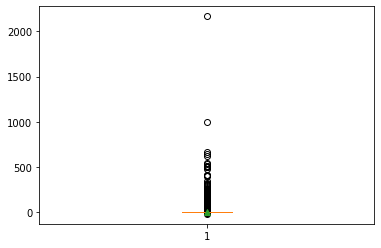

In [196]:
plt.boxplot(cnt,showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x10eb272d0>,
 'caps': [<matplotlib.lines.Line2D at 0x10eb67d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x10eb4f910>],
 'medians': [<matplotlib.lines.Line2D at 0x10eb27d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x10eb5fd90>],
 'means': [<matplotlib.lines.Line2D at 0x10eb546d0>]}

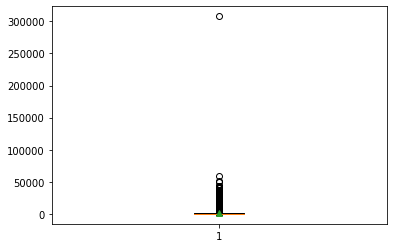

In [197]:
plt.boxplot(price,showmeans=True)

In [776]:
train = train[train.item_cnt_day<1000]
train = train[train.item_price<100000]

## 去除cnt/price 負值

In [777]:
train.loc[train.item_cnt_day < 0, "item_cnt_day"] = 0

In [778]:
train = train[train.item_price > 0].reset_index(drop = True)

## 相同shop處理

In [779]:
shops = pd.read_csv('./data/shops.csv')


In [780]:
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57

train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58

train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11

train.loc[train.shop_id == 39, "shop_id"] = 40
test.loc[test.shop_id == 39, "shop_id"] = 40

## shop劃分為city和category

In [781]:
shops[shops.shop_id == 46]

,shop_name,shop_id
46,"Сергиев Посад ТЦ ""7Я""",46


In [782]:
shops.loc[ shops.shop_name == 'Сергиев Посад ТЦ "7Я"',"shop_name" ] = 'СергиевПосад ТЦ "7Я"'

In [783]:
shops["city"] = shops.shop_name.str.split(" ").map( lambda x: x[0] )
shops["category"] = shops.shop_name.str.split(" ").map( lambda x: x[1] )

In [784]:
shops.loc[shops.city == "!Якутск", "city"] = "Якутск"

In [785]:
shops.head()

,shop_name,shop_id,city,category
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск,"Орджоникидзе,"
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск,ТЦ
2,"Адыгея ТЦ ""Мега""",2,Адыгея,ТЦ
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,ТРК
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,ТЦ


In [786]:
shops.category.unique()

array(['Орджоникидзе,', 'ТЦ', 'ТРК', 'ТРЦ', '(Плехановская,', 'Торговля',
       'ул.', 'ЧС', '"Распродажа"', 'МТРЦ', 'Магазин', 'ТК', 'склад'],
      dtype=object)

In [787]:
# 新設立一個空清單，「shops」資料集中「category」欄位中的資料僅寫入出現頻率較高的資料(在此設為4)於新清單內
category = []
for cat in shops.category.unique():
    print(cat, len(shops[shops.category == cat]) )
    if len(shops[shops.category == cat]) > 3:
        category.append(cat)
# 將出現頻率較低者放入"etc"內
shops.category = shops.category.apply( lambda x: x if (x in category) else "etc" )

Орджоникидзе, 2
ТЦ 28
ТРК 5
ТРЦ 11
(Плехановская, 1
Торговля 1
ул. 2
ЧС 1
"Распродажа" 1
МТРЦ 1
Магазин 1
ТК 5
склад 1


In [788]:
#shops.head(5)

In [789]:
from sklearn.preprocessing import LabelEncoder
shops["shop_category"] = LabelEncoder().fit_transform( shops.category )
shops["shop_city"] = LabelEncoder().fit_transform( shops.city )
shops = shops[["shop_id", "shop_category", "shop_city"]]

In [790]:
shops.head()

,shop_id,shop_category,shop_city
0,0,0,29
1,1,4,29
2,2,4,0
3,3,2,1
4,4,4,2


## item_categories進行細分

In [791]:
cats = pd.read_csv('./Data/item_categories.csv')

In [792]:
#cats.head()

In [793]:
cats["item_type"] = cats.item_category_name.apply( lambda x: x.split(" ")[0] ).astype(str)

In [794]:
#cats.head()

In [795]:
category = []
for cat in cats.item_type.unique():
    print(cat, len(item_cats[cats.item_type == cat]))
    if len(cats[cats.item_type == cat]) > 3: 
        category.append( cat )

PC 1
Аксессуары 7
Билеты 1
Доставка 1
Игровые 8
Игры 14
Карты 5
Кино 5
Книги 13
Музыка 6
Подарки 12
Программы 6
Служебные 2
Чистые 2
Элементы 1


In [796]:
cats.item_type = cats.item_type.apply(lambda x: x if (x in category) else "etc")


In [797]:
#cats.head()

In [798]:
cats.item_type= LabelEncoder().fit_transform(cats.item_type)

In [799]:
#cats.head()

In [800]:
cats["split"] = cats.item_category_name.apply(lambda x: x.split("-"))
cats["subtype"] = cats.split.apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())

In [801]:
#cats.head(5)

In [802]:
cats["subtype_code"] = LabelEncoder().fit_transform( cats["subtype"] )
cats = cats[["item_category_id", "subtype_code", "item_type"]]
# 檢視「cats」資料集前5筆資料
cats.head(5)

,item_category_id,subtype_code,item_type
0,0,29,0
1,1,9,1
2,2,10,1
3,3,11,1
4,4,13,1


## 根據item_name進行篩選/細分

In [803]:
items = pd.read_csv('./data/items.csv')

In [804]:
#items.head()

In [805]:
items["name1"], items["name2"] = items.item_name.str.split("[", 1).str
items["name"],items["name3"] = items.name2.str.split("]", 1).str
items["name"] = items.name.str.replace('[^A-Za-z0-9А-Яа-я]+', " ").str.lower()

items = items.fillna('0')
import re
def name_correction(x):
    x = x.lower()
    x = x.partition('[')[0]
    x = x.partition('(')[0]
    x = re.sub('[^A-Za-z0-9А-Яа-я]+', ' ', x)
    x = x.replace('  ', ' ')
    x = x.strip()
    return x
items["item_name"] = items["item_name"].apply(lambda x: name_correction(x))
items.name= items.name.apply( lambda x: x[:] if x !="0" else "0")

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [806]:
#len(items.name.unique())

In [807]:
items["type"] = items.name.apply(lambda x: x[0:8] if x.split(" ")[0] == "xbox" else x.split(" ")[0] )
items.loc[(items.type == "x360") | (items.type == "xbox360") | (items.type == "xbox 360") ,"type"] = "xbox 360"
items.loc[ (items.type == 'pc' )| (items.type == 'pс') | (items.type == "pc"), "type" ] = "pc"
items.loc[ items.type == 'рs3' , "type"] = "ps3"
items.loc[ items.type == "", "type"] = "mac"

items.type = items.type.apply( lambda x: x.replace(" ", "") )

In [808]:
group_sum = items.groupby(["type"]).agg({"item_id":"count"})
group_sum = group_sum.reset_index()
#group_sum

In [809]:
# 新設立一個空清單，Dataframe「group_sum」中的資料寫入出現頻率較低的資料(在此設為40)於清單內
drop_cols = []
for cat in group_sum.type.unique():
    if group_sum.loc[(group_sum.type == cat), "item_id"].values[0] <40:
        drop_cols.append(cat)


In [810]:
#drop_cols

In [811]:
for i in drop_cols:
    items.name[items.type==i] = "etc"


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [812]:
#len(items.name.unique())

In [813]:
items.drop(["item_name", "name1","name2","name3","type"],axis = 1, inplace= True)

In [814]:
items.name= LabelEncoder().fit_transform(items.name)
items.head()

,item_id,item_category_id,name
0,0,40,4
1,1,76,48
2,2,40,4
3,3,40,4
4,4,40,4
